## WeRateDogs

### WeRateDogs Data Wrangling Project

This project is a part of UDacity Data analysis Nano degree aims to data wrangling project

Data Source: a twitter account of @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs.

This project includes steps as follows:

#1 Data Connection [gathering data, assessing data] 
#2 Data Cleaning [Storing,understanding the data sets] 
#3 Data analysis and visualizing

# Table of Content

1.[Data connection](#step1) 

2.[Data wrangling](#cleaning)
<br><br>
    i.[assessment](#assessment)
<br>
    ii.[Quality](#quality)
<br>
<br>
   2.1. [Case A](#A) <br>
   2.3. [Case C](#C)<br>
   2.4. [Case D](#D)<br>
   2.5. [Case E](#E)<br>
   2.6. [Case F](#F)<br>
   2.7. [Case G](#G)<br>
   2.8. [Case H](#H)<br>



3.[Data visualizing](#viz)

4.[Results and Reporting](#report)

### Step 1 : Data Connection <a id="step1"></a>

#### 1.1. import libraries 

In [225]:
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt 
import numpy as np

#### 1.2. connecting to twitter (data source 1)  

In [14]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key=''
consumer_secret=''
access_token=''
access_secret=''

In [15]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [19]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}

In [20]:
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [236]:
#save the tweet data
tweets_original=0
tweets_original=pd.read_json (r'tweet_json.txt',lines=True)


#### 1.3. connecting to NLP Data file  (data source 2) 

In [237]:
## twitter enhanced database 
enhanced_twitter_extract_original=0
enhanced_twitter_extract_original=pd.read_csv("twitter-archive-enhanced-2.csv")

#### 1.4. connecting to NLP Data file  (data source 3) 

In [238]:
#store the NLP analysis
#load NLP data
NLP_data_original=0
NLP_data_original=pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv",sep='\s+')

### Step 2 : Data Wranging <a id="cleaning"></a>

#### I. Assessment  <a id="assessment"></a>

In [239]:
# work on copies of the data sets before cleaning it
tweets=tweets_original.copy()
enhanced_twitter_extract=enhanced_twitter_extract_original.copy()
NLP_data=NLP_data_original.copy()

In [240]:
print("api tweets are {}".format(tweets.id.count()))
print("enhanced tweets extracts are {}".format(enhanced_twitter_extract.tweet_id.count()))
print("NLP data extracts are {}".format(NLP_data.tweet_id.count()))

api tweets are 2331
enhanced tweets extracts are 2356
NLP data extracts are 2075


In [241]:
#checking if all data sources don't have any duplicates (yes, no duplicate ids found)
(NLP_data.tweet_id.duplicated()).describe()
(enhanced_twitter_extract.tweet_id.duplicated()).describe()
(tweets.id.duplicated()).describe()

count      2331
unique        1
top       False
freq       2331
Name: id, dtype: object

#### 2.1. Understanding Data source 1 [Twitter Data]

In [242]:
#show table headers
tweets.head(5)
#exploring column names
tweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [243]:
#tweets.isnull().sum()
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [244]:
## see one example of the data 
print(str(tweets.loc[209])+'\n \n')

print(tweets.full_text.loc[209])

created_at                                               2017-04-07 13:04:55+00:00
id                                                              850333567704068097
id_str                                                          850333567704068096
full_text                        @markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...
truncated                                                                    False
display_text_range                                                       [12, 136]
entities                         {'hashtags': [], 'symbols': [], 'user_mentions...
extended_entities                                                              NaN
source                           <a href="http://twitter.com/download/iphone" r...
in_reply_to_status_id                                                  8.50329e+17
in_reply_to_status_id_str                                              8.50329e+17
in_reply_to_user_id                                                    2.19551e+07
in_r

###### II. Quality: <a id='quality'></a>
1. many tweets are missing from NLP extracts

2. numerator contains non int values
3. numerator contains values greater than 10
4. denominator contains non int values
5. denominator contains values greater than 10

6. some dogs names are not mentioned.
7. some dogs names don't follow the rule above "this is+dog name"
8. some dog names are more than one word.
9. some dogs are have multiple types (doggo + fluffo)


## CASE A <a id="A"></a>

#### A.Quality:

-`tweets table`: 
1. has different tweet id name [id] ,will cause an issue when joined with other tables.
2. created at column is not a date format.


#### A.Clean:

###### A.define: 

1. renaming column id column name name to be 'tweet_id' 
2. change date format of tweet time to date to ease viz 
3. keep only relevant columns, too many unneccesary columns

#### A.Code:

In [245]:
#renaming column name, to match NLP name when joined
tweets.rename(columns={'id':'tweet_id'}, inplace=True)

In [246]:
#change date format of tweet time to date to ease viz 
tweets['created_at']=pd.DatetimeIndex(tweets['created_at'])

In [247]:
#keep only relevant columns
tweets_short=0
tweets_short=tweets[['created_at','tweet_id','full_text','retweet_count','favorite_count']]

#### A. Test:

In [248]:
tweets_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      2331 non-null   datetime64[ns, UTC]
 1   tweet_id        2331 non-null   int64              
 2   full_text       2331 non-null   object             
 3   retweet_count   2331 non-null   int64              
 4   favorite_count  2331 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 91.2+ KB


## CASE C <a id="C"></a>

#### C.Quality:

-`tweets table`: 
1. unable to identify tweet device from the "source" column.

#### C.Clean:

  ###### C.define: 

1. extract device from the source (devices are either web,iphone or Vine) 

#### C.Code:

In [249]:
# identify the device which the it was tweeted from 
device=[]
start=0
end=0
i=0
for i in tweets.index:
        if (tweets['source'][i].find('iphone')>=0) == True:
            device.append('iphone')
        elif (tweets['source'][i].find('Web')>=0) == True:
            device.append('web')
        elif (tweets['source'][i].find('Vine')>=0) == True:
            device.append('vine')
        elif (tweets['source'][i].find('tweetdeck')>=0) == True:
            device.append('tweetdeck')
        else:
            device.append('NaN')

In [250]:
device_type=pd.DataFrame()
device_type['device']=device

In [251]:
# merge the new device df with the tweets df
tweets_short=pd.merge(tweets_short,device_type,left_index=True,right_index=True)

#### C. Test:

In [252]:
tweets_short.device.groupby(tweets_short.device).count()

device
iphone       2197
tweetdeck      10
vine           91
web            33
Name: device, dtype: int64

## CASE D <a id="D"></a>

#### D.Quality:

-`tweets table`: 
1. ratings are not extracted from the text column

#### D.Clean:

  ###### D.define: 

1. extract the rating by finding "/" what is on left hand side is "numerator" and what is on right is denominator

#### D.Code:

In [253]:
# does all tweets have rating ? Yes 
tweets_short['full_text'].groupby([tweets_short['full_text'].str.contains('/')]).count()

full_text
True    2331
Name: full_text, dtype: int64

In [254]:
numerator=0
denominator=0

In [255]:
# getting the numerator in order to analyze later on 

numerator=[]
for i in tweets_short.index:
    numerator.append(tweets_short['full_text'][i][tweets_short['full_text'][i].find('/')-2:tweets_short['full_text'][i].find('/')])

In [256]:
# getting the numerator in order to analyze late on 
denominator=[]
for i in tweets_short.index:
    denominator.append(tweets_short['full_text'][i][tweets_short['full_text'][i].find('/')+1:tweets_short['full_text'][i].find('/')+3])

In [257]:
# create a dataframe with the two columns (numerator, denominator)
rating=0
rating=pd.DataFrame()
rating['numerator']=numerator
rating['denominator']=denominator

In [258]:
# merge rating to the tweets.
tweets_short=pd.merge(tweets_short,rating,left_index=True, right_index=True)

#### D. Test:

In [259]:
rating.denominator.max()

'sw'

#### D.2.Quality
* numerator contains non int values
* numerator contains values greater than 10

* denominator contains non int values
* denominator contains values greater than 10

#### D.2.Clean:

  ###### D.2.define: 

1. remove all ratings <15
2. remove non digit ratings 
3. remove all deominator <10

In [260]:
## keep ratings till 10/10 

#1 trim the numerator and denominator
tweets_short.numerator=tweets_short.numerator.str.strip()
tweets_short.denominator=tweets_short.denominator.str.strip()

rating_numbers=0
rating_numbers=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']

#2 get only ratings from 0-15/10
#tweets_short_new=0
tweets_short=tweets_short.loc[(tweets_short.numerator.isin(rating_numbers)) & (tweets_short.denominator=='10')]
#tweets_short_new.full_text.groupby(tweets_short_new.numerator).count()
tweets_short.full_text.count()

2286

#### D.2 Test

In [261]:
tweets_short.full_text.groupby(tweets_short.numerator).count()

numerator
0       2
1       8
10    458
11    462
12    551
13    339
14     51
15      2
2       8
3      18
4      15
5      34
6      32
7      53
8     100
9     153
Name: full_text, dtype: int64

## CASE E <a id="E"></a>

####  E Quality
-`tweets table` contains retweets and replies

#### E.Clean:

  ###### E.define: 


- define all RT or starts with "@"
- take out all retweets and replies

#### E. Code

In [262]:
## Define all retweets and replies

In [263]:
# create a list of all retweets
retweet=[]
for i in tweets_short.index:
    if tweets_short.full_text.loc[i].find('RT')>=0:
        retweet.append(True)
    else:
        retweet.append(False)
    

In [264]:
#create a list of all replies

reply=[]
for i in tweets_short.index:
    if tweets_short.full_text.loc[i][0]=='@':
        reply.append(True)
    else:
        reply.append(False)
   

In [265]:
#join [replies and retweets] list 
reply_retweet=0
reply_retweet=pd.DataFrame()
reply_retweet['reply']=reply
reply_retweet['retweet']=retweet

In [266]:
# merge the reply_retweet to the full list

tweets_short=pd.merge(tweets_short,reply_retweet,left_index=True, right_index=True)

In [267]:
tweets_short.groupby(tweets_short.reply).count()

,created_at,tweet_id,full_text,retweet_count,favorite_count,device,numerator,denominator,reply,retweet
reply,,,,,,,,,,
False,2225,2225,2225,2225,2225,2225,2225,2225,2225,2225
True,17,17,17,17,17,17,17,17,17,17


In [268]:
## keep only organic tweets

In [269]:
## keep only relvant tweets excluding retweets and replies

print(tweets_short.full_text.groupby(tweets_short.reply).count())
print(tweets_short.full_text.groupby(tweets_short.retweet).count())

reply
False    2225
True       17
Name: full_text, dtype: int64
retweet
False    2072
True      170
Name: full_text, dtype: int64


In [270]:
# keep only original tweets
tweets_short=tweets_short.loc[(tweets_short.retweet==False) & (tweets_short.reply==False)]
tweets_short.full_text.count()

2055

### E Test

In [271]:
tweets_short.full_text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2281    These are Peruvian Feldspars. Their names are ...
2282    12/10 simply brilliant pup https://t.co/V6ZzG4...
2283    This is Jeph. He is a German Boston Shuttlecoc...
2284    This is Jockson. He is a Pinnacle Sagittarius....
2285    Unfamiliar with this breed. Ears pointy af. Wo...
Name: full_text, Length: 2055, dtype: object

## CASE F <a id="F"></a>

####  F Quality
-`tweets table` text contains the dog name, unable to identify it

#### F.Clean:

  ###### F. define: 


- extract the dog name based on the following criteria: begaining of the tweet after the word "This is", and then dog name and then "."

#### F. Code

In [272]:
#create a list of all dogs names 
## the dog name is always said the the begaining of the tweet after the word "This is", and then dog name and then "."


name=[]
for i in tweets_short.index:
    if tweets_short.full_text.loc[i][0:7].lower()=='this is':
        name.append(tweets_short.full_text.loc[i][8:tweets_short.full_text.loc[i].find('.')])
    else: 
        name.append("NaN")

In [273]:
dog_name=0

In [274]:
#assign the list to a dataframe 
dog_name=pd.DataFrame()
dog_name['dog_name']=name

In [275]:
# merge the dog name  to the full list

tweets_short=pd.merge(tweets_short,dog_name,left_index=True, right_index=True)

#### F. Test

In [276]:
dog_name

,dog_name
0,Phineas
1,Tilly
2,Archie
3,Darla
4,Franklin
...,...
2050,NaN
2051,NaN
2052,Jeph
2053,Jockson


##### Quality
* some dogs names are not mentioned.
* some dogs names don't follow the rule above "this is+dog name" 
* some dog names are more than one word.

## CASE F-2 (Find the names from "enhanced_twitter_extract" table)

In [277]:
enhanced_twitter_extract.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Tanner       1
Samsom       1
Pavlov       1
Aiden        1
Amy          1
Name: name, Length: 957, dtype: int64

#### Quality F-2 

- Dogs without names, but given names of “a” or “an” instead of “None”

#### Clean F-2

###### Define 

- find the list of wrong names and use for loop to give the individual name of “None”.

##### Code F-2

In [278]:
for i in enhanced_twitter_extract.index:
    if enhanced_twitter_extract.name.loc[i]=='a':
        enhanced_twitter_extract.name.loc[i]='None'
    elif enhanced_twitter_extract.name.loc[i]=='an':
        enhanced_twitter_extract.name.loc[i]='None'
    else:
        pass
        

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


##### test F-2

In [279]:
# show all names except for none
enhanced_twitter_extract.name[enhanced_twitter_extract.name!='None'].value_counts()

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Lola       10
           ..
Rey         1
Tanner      1
Samsom      1
Pavlov      1
Amy         1
Name: name, Length: 954, dtype: int64

## CASE G <a id="G"></a>

In [280]:
## define how many dog type in each category 
enhanced_twitter_extract.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


####  G Quality
-`enhanced_twitter_extract table` contains multiple tables for dog type


#### G.Clean:

  ###### G. define: 


- create one column that contains all dog type
- if one dog has two types choose select all seperated by comma.

#### G. Code

In [281]:
# if type doesn't exists replace it with " " empty string
enhanced_twitter_extract.doggo.replace('None', '', inplace=True)
enhanced_twitter_extract.floofer.replace('None', '', inplace=True)
enhanced_twitter_extract.pupper.replace('None', '', inplace=True)
enhanced_twitter_extract.puppo.replace('None', '', inplace=True)

In [282]:
# replace nan with empty string 
enhanced_twitter_extract.doggo.replace(np.NaN, '', inplace=True)
enhanced_twitter_extract.floofer.replace(np.NaN, '', inplace=True)
enhanced_twitter_extract.pupper.replace(np.NaN, '', inplace=True)
enhanced_twitter_extract.puppo.replace(np.NaN, '', inplace=True)

In [283]:
## get the final dog type in one column, if many columns concatenate them using comma
enhanced_twitter_extract['type'] = enhanced_twitter_extract.doggo + enhanced_twitter_extract.floofer + enhanced_twitter_extract.pupper + enhanced_twitter_extract.puppo
enhanced_twitter_extract.loc[enhanced_twitter_extract.type == 'doggopupper', 'type'] = 'doggo, pupper'
enhanced_twitter_extract.loc[enhanced_twitter_extract.type == 'doggopuppo', 'type'] = 'doggo, puppo'
enhanced_twitter_extract.loc[enhanced_twitter_extract.type == 'doggofloofer', 'type'] = 'doggo, floofer'

In [284]:
# merge different dog types in order to help in viz (something like pivoting)

#enhanced_twitter_extract['type']=enhanced_twitter_extract[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [285]:
## checking if one dog is in two types or not 
#enhanced_twitter_extract[(enhanced_twitter_extract['puppo']!='None') & (enhanced_twitter_extract['doggo']!='None')]

In [286]:
## keep only relevant columns 
enhanced_twitter_extract=enhanced_twitter_extract[['tweet_id','type','name']]

### G Test

In [287]:
# check the new column output 
enhanced_twitter_extract.type.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: type, dtype: int64

In [288]:
# show only non null type
# show the latter type if the dog has two types. 
#enhanced_twitter_extract[enhanced_twitter_extract['type']!='None']

## CASE H  <a id="H"></a>

###### CASE H: joining Cleaned Tweets, enhaned extracts data with NLP data

In [289]:
NLP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [290]:
#join tweets with the NLP 
all_data=0
all_data = pd.merge(tweets_short, NLP_data, on=['tweet_id'])

In [291]:
all_data=pd.merge(enhanced_twitter_extract,all_data,on=['tweet_id'])

In [292]:
# keeping only important fields for analysis
all_data=all_data[['created_at','device','retweet_count','favorite_count','numerator','name','type','p1','p1_conf']]



In [293]:
#saving the clean data on a local drive

all_data.to_csv("Cleaned_master_dataset.csv",index=False)

### Step 3 : Data Analysis and visualization <a id="viz"></a>

Text(0.5, 0, 'year - month')

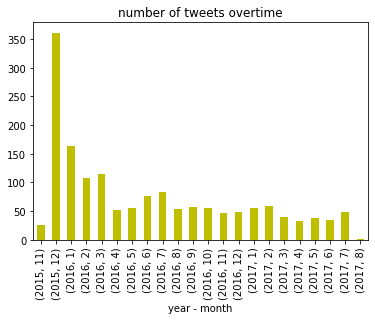

In [294]:
#show number of tweets progressing over time
tweets_overtime=(all_data.p1.groupby(by=[all_data.created_at.dt.year, all_data.created_at.dt.month]).count())
tweets_overtime.plot(kind='bar',title='number of tweets overtime',color='y').set_xlabel("year - month")#.set_ylabel("number of tweets")

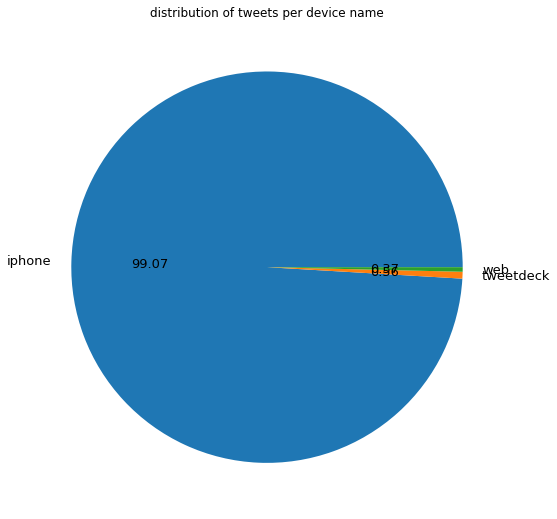

In [295]:
# show the distribution of devices to tweet
tweets_by_device=all_data.device.groupby(all_data.device).count()
tweets_by_device.plot.pie(figsize=(9,9),fontsize=13,title='distribution of tweets per device name',autopct='%.2f',label='')

In [296]:
#breakdown of devices 
all_data['device'].groupby(all_data['device']).count()

device
iphone       1591
tweetdeck       9
web             6
Name: device, dtype: int64

Text(0, 0.5, 'number of tweets')

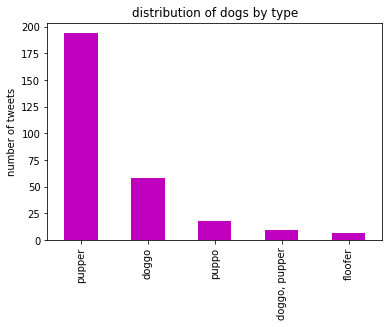

In [329]:
#viz the output
(all_data.type.value_counts()[1:]).plot(kind='bar',color='m',title='distribution of dogs by type' ).set_ylabel('number of tweets')

Text(0.5, 0, 'Rating')

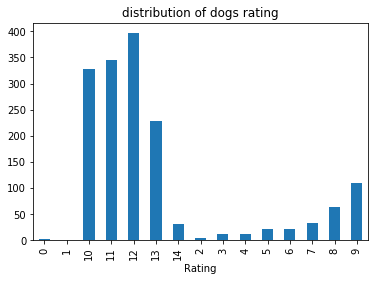

In [205]:
# is dogs rating nurmally distributed ? 
ax=all_data.numerator.groupby(all_data.numerator).count()#.sort_values(ascending=True)
ax.plot.bar(title= 'distribution of dogs rating').set_xlabel("Rating")#.set_ylabel("count the number of Dogs")


Text(0.5, 0, 'number of tweets')

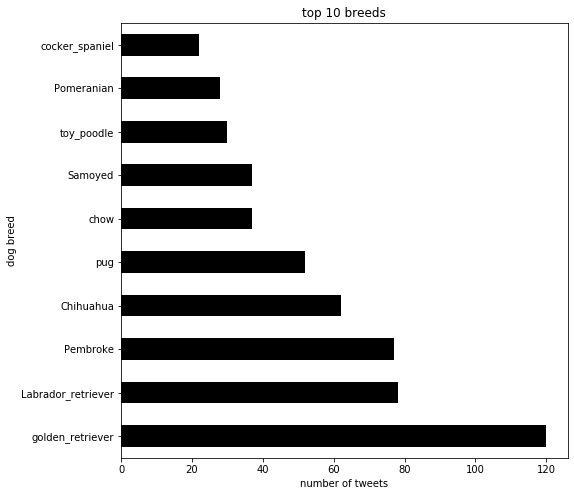

In [206]:
#top 10 breed on #weratedogs accounts
x=all_data.p1.groupby(all_data.p1).count().sort_values(ascending=False).head(10)
d=x.plot(kind='barh',title='top 10 breeds',figsize=(8,8),color='k')
d.set_ylabel('dog breed')
d.set_xlabel('number of tweets')

In [211]:
#most common dog name 
all_data.name[all_data.name!='None'].value_counts()

Oliver    10
Penny      8
Cooper     8
Tucker     8
Lucy       8
          ..
Doc        1
Dylan      1
Eevee      1
quite      1
Amy        1
Name: name, Length: 786, dtype: int64

Text(0.5, 0, 'number of dogs')

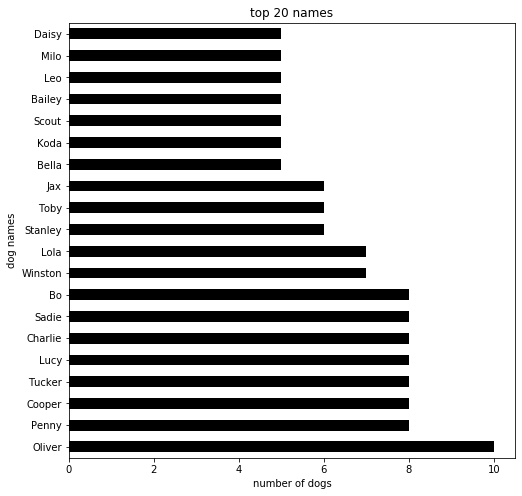

In [212]:
#top 10 dogs names on #weratedogs accounts
x=all_data.name[all_data.name!='None'].value_counts().head(20)
d=x.plot(kind='barh',title='top 20 names',figsize=(8,8),color='k')
d.set_ylabel('dog names')
d.set_xlabel('number of dogs')

In [ ]:
## is there a correlation between number of likes and number of retweets? 
import numpy as np
y=all_data.retweet_count
x=all_data.favorite_count

m=plt.plot(np.log(x), np.log(y),'x', color='darkred');
correlation=all_data[['retweet_count','favorite_count']].corr()
print(correlation)

### 4. Report <a id="report"></a>